# Lennard Jones gas in NVT ensemble

In [30]:
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, nc*nc*nc))

In [31]:
# Parameter
# all in reduced units
L=10
N=200
T=0.7
V=L**3
rho=N/V
print(rho)

0.2


In [32]:
#lenard jones potential truncated and shifted
rc=2.5
def u(i,j,r_c=rc):
    r=lg.norm(i-j)
    if r>r_c: 
        return 0
    else:        
        return 4*(r**-12-r**-10+r_c**-12-r_c**-12) 

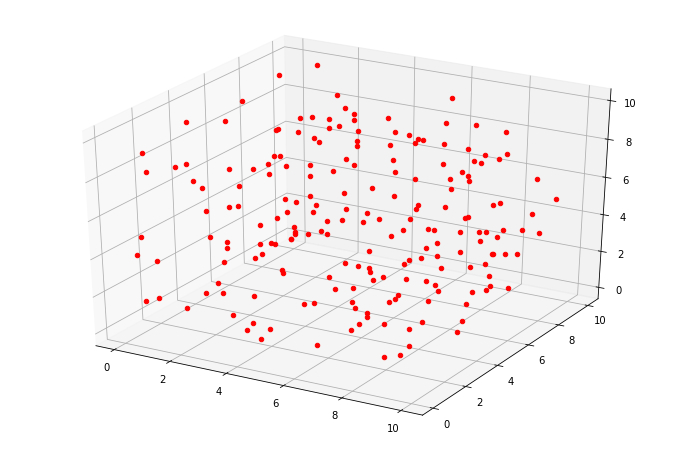

In [33]:
pos=[L*np.random.random(3) for i in range(N)]
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(projection='3d')
for x,y,z in pos:
    ax.scatter(x,y,z,'.',c='red')

In [34]:
# Cell list creation

nc=int(L/rc)
lc=L/nc
c=[]
for i in range(nc):
    c.append([])
    for j in range(nc):
        c[i].append([])
        for k in range(nc):
            c[i][j].append([])
nn=np.zeros((N,3),dtype=int)

for i in range(N):
    n1,n2,n3=[int(pos[i][j]/lc) for j in range(3)]
    c[n1][n2][n3].append(i)
    nn[i]=[n1,n2,n3]


In [35]:
nn

array([[3, 3, 0],
       [1, 1, 0],
       [0, 1, 1],
       [2, 3, 0],
       [1, 2, 3],
       [1, 3, 3],
       [3, 0, 0],
       [1, 3, 2],
       [3, 1, 2],
       [1, 1, 3],
       [0, 3, 3],
       [3, 1, 1],
       [3, 1, 1],
       [3, 3, 3],
       [3, 3, 1],
       [2, 1, 1],
       [1, 0, 3],
       [1, 2, 1],
       [2, 0, 1],
       [1, 0, 0],
       [0, 3, 0],
       [1, 1, 2],
       [0, 2, 0],
       [1, 3, 2],
       [3, 2, 0],
       [2, 2, 2],
       [1, 2, 2],
       [2, 2, 1],
       [1, 0, 0],
       [0, 0, 3],
       [0, 1, 3],
       [3, 2, 0],
       [0, 3, 2],
       [2, 1, 2],
       [1, 0, 2],
       [1, 3, 0],
       [3, 2, 1],
       [1, 1, 2],
       [1, 0, 0],
       [3, 0, 0],
       [0, 3, 1],
       [2, 3, 0],
       [2, 1, 0],
       [3, 3, 1],
       [2, 2, 3],
       [1, 1, 3],
       [2, 3, 2],
       [0, 2, 1],
       [1, 1, 1],
       [0, 1, 2],
       [2, 2, 0],
       [1, 2, 1],
       [2, 3, 1],
       [2, 2, 2],
       [1, 0, 2],
       [2,

In [36]:
c

[[[[121, 150, 164], [195, 196], [83, 146], [29, 66, 154, 180]],
  [[93, 138, 169], [2, 98], [49, 102, 123, 173], [30, 119]],
  [[22, 141], [47, 145, 160], [152, 182], [94, 192]],
  [[20, 68], [40], [32, 92, 129], [10, 120, 127, 183]]],
 [[[19, 28, 38, 59, 167], [114, 139], [34, 54, 137, 161], [16, 61, 117, 170]],
  [[1, 124, 130], [48, 87, 95], [21, 37], [9, 45, 60, 75]],
  [[78, 115, 156], [17, 51, 188], [26, 57, 191], [4, 70, 89, 165]],
  [[35, 126, 144], [186], [7, 23, 172, 175, 194], [5, 71, 128, 166, 189]]],
 [[[84], [18], [58, 65, 131], [109, 136]],
  [[42, 56, 106], [15, 55, 62, 85, 157], [33, 64, 77, 122, 148], [63, 96]],
  [[50, 111, 199], [27, 113, 198], [25, 53, 72, 174], [44, 105, 190]],
  [[3, 41, 67, 112, 179], [52, 76, 108], [46, 80, 99, 162, 197], [103, 151]]],
 [[[6, 39, 101, 147], [86, 88, 104, 118, 132, 143, 171], [], []],
  [[107, 149], [11, 12, 155, 159, 181], [8, 74, 176], [69, 97]],
  [[24, 31, 135, 158], [36, 73, 91, 163, 184], [177], [100, 134, 153, 193]],
  [[

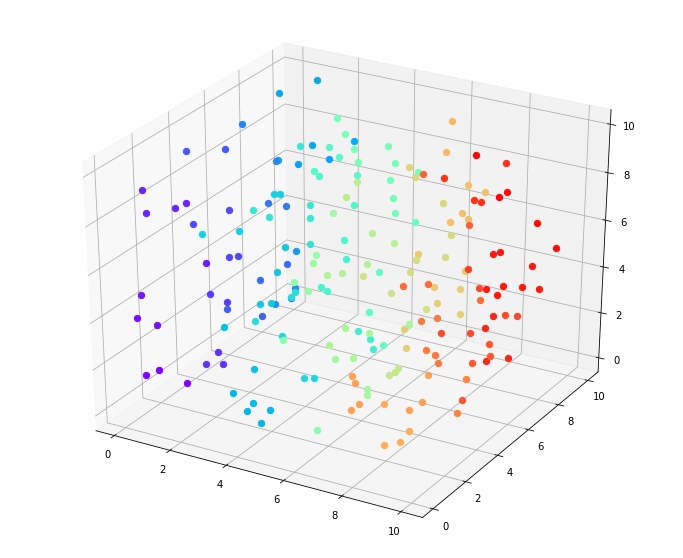

In [40]:
l=0
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(projection='3d')
for i in range(nc):
    for j in range(nc):
        for k in range(nc):
            for cc in c[i][j][k]:
                if cc:
                    x,y,z = pos[cc]
                    ax.scatter(x,y,z,'.',color=colors[l],s=40)
            l+=1

In [41]:
#Energy evaluation
def en():
    e=0.
    for p in range(N):
        n1,n2,n3=nn[p]
        t=[0.5*u(pos[p],pos[cc]) for cc in c[n1][n2][n3] if cc!=p and  cc]
    #    filter(lambda v: v==v,t)
        e+=sum(t)
        for i in [-1+nc,nc,nc+1]:
            for j in [-1+nc,nc,nc+1]:
                for k in [-1+nc,nc,nc+1]:
                    t=[0.5*u(pos[p],pos[cc]) for cc in c[(n1+i)%nc][(n2+j)%nc][(n3+k)%nc] if cc!=p and cc]
                    e+=sum(t)
    return e/N
e=en()
e

2381732.2813954228

In [42]:
#mc move
# Move for 0.1 sigma
# update list 
def mcmove(c,nn):
    for i in range(N):
        p=np.random.randint(0,N)
        xi=(pos[p]+(0.5-np.random.random(3))*0.1+L)%L
        e0=0.
        e1=0.
        nn1,nn2,nn3=nn[p]
        for i in [-1+nc,nc,nc+1]:
            for j in [-1+nc,nc,nc+1]:
                for k in [-1+nc,nc,nc+1]:
                    t=[u(pos[p],pos[cc]) for cc in c[(nn1+i)%nc][(nn2+j)%nc][(nn3+k)%nc] if cc!=p and cc]
                    e0+=sum(t)

        n1,n2,n3=[int(xi[j]/lc) for j in range(3)]
        for i in [-1+nc,nc,nc+1]:
            for j in [-1+nc,nc,nc+1]:
                for k in [-1+nc,nc,nc+1]:
                    t=[u(xi,pos[cc]) for cc in c[(n1+i)%nc][(n2+j)%nc][(n3+k)%nc] if cc!=p and cc]
                    e1+=sum(t)
        
        if np.logical_or(e1<=e0,(e1>e0 and np.exp(-(e1-e0)/T)>np.random.random())):
            pos[p]=xi
            if (not np.all([n1,n2,n3]==nn[p])):
                c[nn1][nn2][nn3].remove(p)
                c[n1][n2][n3].append(p)
                nn[p]=[n1,n2,n3]
    return(c.copy(),nn.copy())

In [43]:
E=[e]
for t in range(200):
    c,nn=mcmove(c,nn)
    E.append(en())

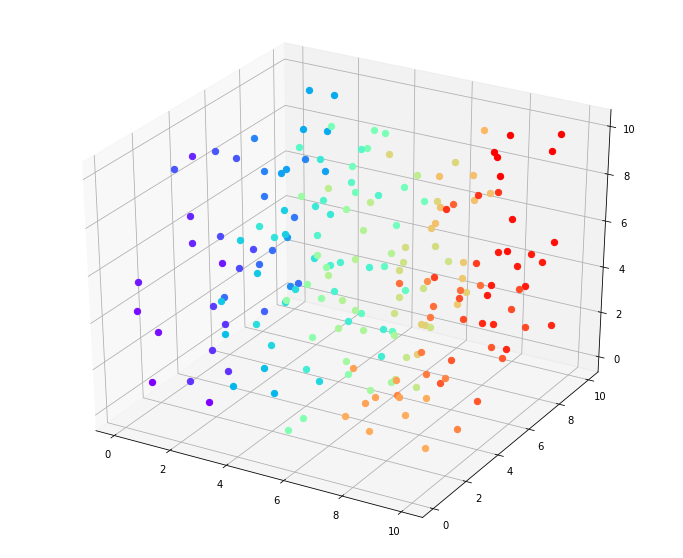

In [48]:
l=0
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(projection='3d')
for i in range(nc):
    for j in range(nc):
        for k in range(nc):
            for cc in c[i][j][k]:
                if cc:
                    x,y,z = pos[cc]
                    ax.scatter(x,y,z,'.',color=colors[l],s=40)
            l+=1

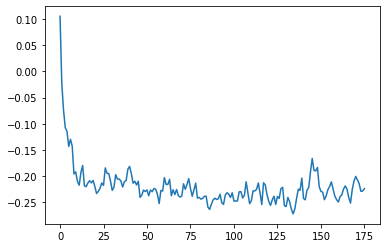

In [47]:
E=np.asarray(E)
plt.plot(E[25:])

## Alternative cell list

In [ ]:
#Create cell_list and a vector with cell index of particles in the list
#can be usefull for the energy

def cell_list():
    nc=int(L/rc)
    lc=L/nc
    c=[[] for i in range(nc*nc*nc)]
    nn=np.zeros(N,dtype=int)
    for i in range(N):
        n=sum([int(pos[i][j]/lc)*nc**j for j in range(3)])
        nn[i]=n
        c[n].append(i)
    return c,nn

c,nc=cell_list()
print(c,'\n',nc)